# FOR COMBINED ANALYSIS OF SMC AND LMC DATA (to look into the overall correlation)

In [2]:
import astropy
import numpy as np
import matplotlib
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from astropy.visualization import astropy_mpl_style
import pandas as pd
plt.style.use(astropy_mpl_style)

%matplotlib inline

In [3]:
# SMC file
SMC = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits')
SMC.info()
SMC[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   13495   (3901, 3471, 84)   float32   


SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 3901  /                                               
NAXIS2  =                 3471  /                                               
NAXIS3  =                   84  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2019-12-22T06:12:09.7'  /                                            
TELESCOP= 'ASKAP   '  /     

In [50]:
SMC_CD_tot = 1.82 * (10 ** 18) * np.nansum(SMC[0].data, axis = 0) * 0.977198303456
LMC_CD_tot = 1.82 * (10 ** 18) * np.sum(LMC[0].data, axis = 0) * 0.244297870185

In [4]:
# LMC file
LMC = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/LMC_30Dor_fg/the actual cube!.fits')
LMC.info()
LMC[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/LMC_30Dor_fg/the actual cube!.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   31725   (3191, 2681, 301)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 3191                                                  
NAXIS2  =                 2681                                                  
NAXIS3  =                  301                                                  
BLANK   =                   -1  /                                               
BUNIT   = 'K       '                                                            
DATE-OBS= '2021-10-27T16:16:57.5'  /                                            
TELESCOP= 'ASKAP   '  /                                                         
CRPIX1  =    1.70200000000E+03  /                                               
CDELT1  =   -1.94444444444E-03  /                                               
CRVAL1  =    8.32511958333E+

In [5]:
SMC_sum_data = np.nansum(np.nansum(SMC[0].data, axis = 1), axis = 1)
LMC_sum_data = np.sum(np.sum(LMC[0].data, axis = 1), axis = 1)

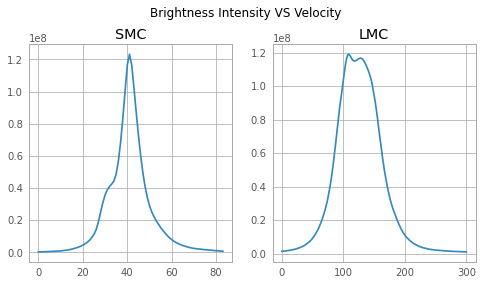

In [6]:
# plot of brightness intensity vs velocity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (1, 4))
ax1.plot(SMC_sum_data) 
ax1.set_title('SMC')

ax2.plot(LMC_sum_data)
ax2.set_title('LMC')
fig.suptitle('Brightness Intensity VS Velocity', y = 1.01)
plt.show()

# very clear peak for SMC, more spread out for LMC

May be multiple warm clouds of HI in the LMC

In [42]:
# information from the absorption line data file (with central velocities)

FUSE_v = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_H2_components.csv')

In [22]:
FUSE_v

star       vcen         RA        DEC  total_log10_N
0    4U0532-664 -11.220067  83.206583 -66.370417      15.971957
1         AV104   7.389808  12.910521 -72.801528      18.391960
2         AV135  23.409269  13.206333 -72.140722      18.284586
3          AV14   2.697139  11.636083 -73.101556      17.548565
4          AV15   2.187902  11.675792 -73.415194      16.436119
..          ...        ...        ...        ...            ...
182    Sk-69_94  41.290652  79.560542 -69.250278      17.699636
183    Sk-71.50  10.248197  85.180500 -71.483139      19.530947
184    Sk-71_38   1.383824  82.661542 -71.029972      18.988490
185       Sk155   3.611276  18.708333 -73.338056      15.653052
186       Sk157   4.448142  18.966292 -73.346833      15.446232

[187 rows x 5 columns]

In [28]:
# needed to distinguish green from blue
size_v = np.zeros(len(v_cen))
alr_in = set(())
zorder = np.zeros(len(v_cen))
count = 0 # number of locations (not including multiple sightlines)
for i in range(len(FUSE_v['star'])):
    if FUSE_v['star'].iloc[i] not in alr_in:
        alr_in.add(FUSE_v['star'].iloc[i])
        size_v[i] = 85
        zorder[i] = 1
        count += 1
    else:
        size_v[i] = 280
        zorder[i] = 0.5

162 162
Slope: 0.015917992100858876


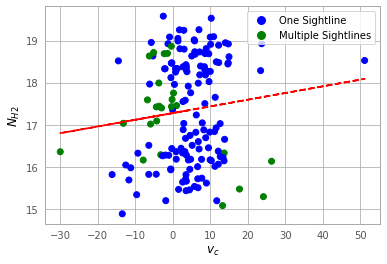

In [29]:
# plot of central velocity versus H2 column density W/O ALL SIGHTLINES
# sightlines that appear multiple times = green and the AVG of their velocities and N_H2 was used
# INTERESTING - when all sightlines used, the correlation was not upwards (was mostly flat w/h slope of 0); now the correlation is upwards

# creating arrays to scatter
v_cen_avg, log10_H2_avg = [], [] # array for new averaged center velocities and averaged N_H2
count = 0 # index of v_cen_avg we on
colors = []

for i in range(len(size_v)):
    if size_v[i] == 85:
        v_cen_avg.append(v_cen[i])
        log10_H2_avg.append(log10_H2[i])
        colors.append('blue')
        count += 1
    else: # there are multiple sightlines
        v_cen_avg[count - 1] = (v_cen[i - 1] + v_cen[i]) / 2.0
        log10_H2_avg[count - 1] = (log10_H2[i - 1] + log10_H2[i]) / 2.0
        colors[count - 1] = 'green'

print(len(v_cen_avg), len(log10_H2_avg))

# doing actual plotting
scatter = plt.scatter(v_cen_avg, log10_H2_avg, c = colors)
plt.xlabel('$v_c$')
plt.ylabel('$N_{H2}$')
line_of_best_fit(v_cen_avg, log10_H2_avg, 'Red')

# making legend
legend = [Line2D([0], [0], marker = 'o', color = 'w', label = 'One Sightline', markerfacecolor = 'b', markersize = 10, ls = ''),
    Line2D([0], [0], marker = 'o', color = 'w', label = 'Multiple Sightlines', markerfacecolor = 'g', markersize = 10, ls = '')]
plt.gca().legend(handles = legend)

# PLOTTING HI VS H2 CORRELATIONS

In [32]:
x_col = FUSE_v['RA']
y_col = FUSE_v['DEC']
brightness = FUSE_v['total_log10_N']

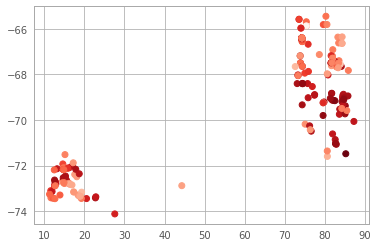

In [41]:
# grab pixel (HI) associated with location of each absorption line 

scatter_pts = plt.scatter(x_col, y_col, c = brightness, cmap = 'Reds')
ra_vals_tot = scatter_pts.get_offsets()[:,0] # gets RA vals
dec_vals_tot = scatter_pts.get_offsets()[:,1] # gets dec vals

#print(ra_vals)
#print("\n")
#print(dec_vals)

In [37]:
# make 2D header 
def make_flat_hdr(file):
    hdr = file[0].header
    
    # Make a 2D header 
    flathdr = fits.Header()
    flathdr["NAXIS   "] = 2
    flathdr["NAXIS1  "] = hdr["NAXIS1  "]
    flathdr["NAXIS2  "] = hdr["NAXIS2  "]
    flathdr["CRPIX1  "] = hdr["CRPIX1  "]
    flathdr["CRPIX2  "] = hdr["CRPIX2  "]
    flathdr["CRVAL1  "] = hdr["CRVAL1  "]
    flathdr["CRVAL2  "] = hdr["CRVAL2  "]
    flathdr["CDELT1  "] = hdr["CDELT1  "]
    flathdr["CDELT2  "] = hdr["CDELT2  "]
    flathdr["CTYPE1  "] = hdr["CTYPE1  "]
    flathdr["CTYPE2  "] = hdr["CTYPE2  "]
    flathdr["LONPOLE "] = hdr["LONPOLE "]
    flathdr["LATPOLE "] = hdr["LATPOLE "]
    
    return flathdr

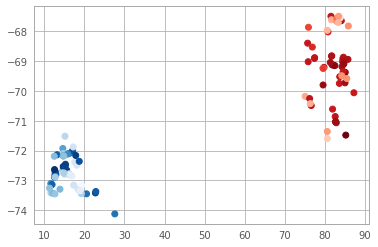

In [47]:
SMC_flat_hdr = make_flat_hdr(SMC)
LMC_flat_hdr = make_flat_hdr(LMC)

SMC_FUSE = FUSE_v[(FUSE_v["DEC"] < -69) & (FUSE_v["RA"] < 28)]
LMC_FUSE = FUSE_v[(FUSE_v["DEC"] < -67.5) & (FUSE_v["RA"] > 75)]
SMC_bright = SMC_FUSE['total_log10_N']
LMC_bright = LMC_FUSE['total_log10_N']

SMC_scat = plt.scatter(SMC_FUSE['RA'], SMC_FUSE['DEC'], c = SMC_bright, cmap = 'Blues')
LMC_scat = plt.scatter(LMC_FUSE['RA'], LMC_FUSE['DEC'], c = LMC_bright, cmap = 'Reds')
SMC_ra = SMC_scat.get_offsets()[:, 0]
SMC_dec = SMC_scat.get_offsets()[:, 1]
LMC_ra = LMC_scat.get_offsets()[:, 0]
LMC_dec = LMC_scat.get_offsets()[:, 1]

In [35]:
# gives pix vals associated w RA/DEC vals using FITS header

def get_pix_vals(flat_FITS_hdr, ra_values, dec_values):
    wcs = WCS(flat_FITS_hdr)
    pix_arr = []
    x_pix = []
    y_pix = []
    for i in range(0, len(ra_values)):
        arr = []
        x_pix, y_pix = wcs.all_world2pix(ra_values[i], dec_values[i], 0)
        arr.append(x_pix)
        arr.append(y_pix)
        pix_arr.append(arr)
    
    return pix_arr

In [48]:
SMC_pix_arr = get_pix_vals(SMC_flat_hdr, SMC_ra, SMC_dec)
LMC_pix_arr = get_pix_vals(LMC_flat_hdr, LMC_ra, LMC_dec)

In [49]:
# gives arr of H1 col densities given the pixels with which the background stars corresponded to 

def col_dens_arr(pix_arr, col_dens_vals):
    HI_col_dens = []
    HI_col_dens_nolog = [] # array of the col dens w/o a logarithmic function applied to it
    for i in range(0, len(pix_arr)):
        # RA values = 0, Dec = 1 BUT the rows in col_dens_vals = y-values, cols = x-values
        col_dens = col_dens_vals[int(pix_arr[i][1])][int(pix_arr[i][0])] 
        # so the values are logarithmic (to match H2 col dens) and in cm^-2
        HI_col_dens_nolog.append(col_dens)
        HI_col_dens.append(np.log10(col_dens))
    
    return HI_col_dens

In [51]:
SMC_HI_tot = col_dens_arr(SMC_pix_arr, SMC_CD_tot)
LMC_HI_tot = col_dens_arr(LMC_pix_arr, LMC_CD_tot)

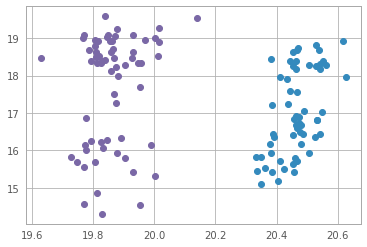

In [55]:
# general upwards trend has been upheld!

plt.scatter(SMC_HI_tot, SMC_FUSE['total_log10_N'])
plt.scatter(LMC_HI_tot, LMC_FUSE['total_log10_N'])

# INVESTIGATING HOW H2 VELOCITIES COMPARE TO VELOCITIES OF OTHER ELEMENTS 

In [61]:
elem = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_H2_other_elem.csv')

In [59]:
elem

star    H2_vcen  C_I_vcen  Cl_I_vcen  NiII_vcen  Instrument  \
0      LH103102 -18.636852       NaN        NaN        NaN         NaN   
1    4U0532-664 -11.220067       4.6        5.3       -2.2  stis_e140m   
2         AV135  23.409269       NaN        NaN        NaN         NaN   
3         AV104   7.389808       3.1        3.8        1.8  stis_e140m   
4          AV14   2.697139       5.2        NaN       -2.4  stis_e140m   
..          ...        ...       ...        ...        ...         ...   
180    Sk-69_94  41.290652       NaN        NaN        NaN         NaN   
181        SK82   3.226641       1.9        NaN       -2.8  stis_e140m   
182    Sk-71_38   1.383824       NaN        NaN        NaN         NaN   
183     SMC-X-1   0.863759      -2.3        0.7       -6.6  stis_e140m   
184       Sk157   4.448142       NaN        NaN        NaN         NaN   

            RA        DEC  total_log10_N galaxy_field ULLYSES_name  \
0    74.189167 -66.412750      18.761577          LMC          NaN   
1    83.206583 -66.370417      15.971957          LMC      LMC X-4   
2    13.206333 -72.140722      18.284586          SMC          NaN   
3    12.910521 -72.801528      18.391960          SMC       AV 104   
4    11.636083 -73.101556      17.548565          SMC        AV 14   
..         ...        ...            ...          ...          ...   
180  79.560542 -69.250278      17.699636          LMC          NaN   
181  14.940500 -72.748917      16.356004          SMC       AV 235   
182  82.661542 -71.029972      18.988490          LMC          NaN   
183  19.271667 -73.443306      16.354942          SMC       AV 490   
184  18.966292 -73.346833      15.446232          SMC          NaN   

     ULLYSES_sep_arcsec  has_hst  
0              8.515753    False  
1              0.326232     True  
2            402.903243    False  
3              0.731995     True  
4              0.152993     True  
..                  ...      ...  
180          270.361550    False  
181            0.341260     True  
182           58.898994     True  
183            0.254777     True  
184           46.661646    False  

[185 rows x 13 columns]

In [81]:
elem_v = [] # holds (averaged, if necessary) velocities of other elements
H2_v = [] # holds corresponding velocities of H2
for i in range(len(elem)):
    used = True # using current row of elem
    if (np.isnan(elem['C_I_vcen'].iloc[i]) == False) & (np.isnan(elem['Cl_I_vcen'].iloc[i]) == False):
        elem_v.append(np.mean([elem['C_I_vcen'].iloc[i], elem['Cl_I_vcen'].iloc[i]]))
    elif (np.isnan(elem['C_I_vcen'].iloc[i]) == False):
        elem_v.append(elem['C_I_vcen'].iloc[i])
    elif (np.isnan(elem['Cl_I_vcen'].iloc[i]) == False):
        elem_v.append(elem['Cl_I_vcen'].iloc[i])
    else:
        used = False
    if used == True: 
        H2_v.append(elem['H2_vcen'].iloc[i])

The velocities seem to be pretty similar for the carbon/chlorine in that upper clump, but varying primarily for H2

Text(0, 0.5, 'Carbon/Chlorine Central Velocities')

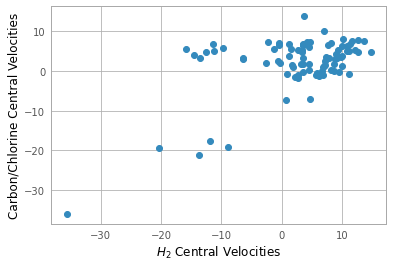

In [80]:
plt.scatter(H2_v, elem_v)
plt.xlabel('$H_2$ Central Velocities')
plt.ylabel('Carbon/Chlorine Central Velocities')